# Exploratory Data Analysis
## Haberman's Data set

Contains details of cancer survival rates

In [1]:
#Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels import robust

In [2]:
#Read the data set
df = pd.read_csv('haberman.csv', names = ['Age','Op_Year','axil_nodes','Surv_status'])
df

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [3]:
df.shape

(306, 4)

In [4]:
#Find out survival status counts
df['Surv_status'].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

In [5]:
#Research and understanding on the features of the data set
print(df.columns)

#To find the range of years for data set
print('Operation years range: {0} - {1}'.format(df['Op_Year'].min(),df['Op_Year'].max()))

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')
Operation years range: 58 - 69


Data set contains information on patients who have undergone surgery for breast cancer
Understanding of above columns:
1. Age: Age of the patient as of surgery
2. Op_Year: Year of operation (Between 1958-1970 as per kaggle description, but 1958-1970 as per data range)
3. axil_nodes: Number of positive axilliary lymph nodes detected during surgery
4. Surv_status: Survival status of the patient (1 = Patient survived >= 5 years; 2 = Patient died < 5 years)

Sources:
1. https://www.kaggle.com/gilsousa/habermans-survival-data-set
2. https://www.medicalnewstoday.com/articles/319713.php

### Objective: Perform EDA to understand the survival status (Class label) of a patent given Age, Op_Year and axil_nodes

### Univariate analysis

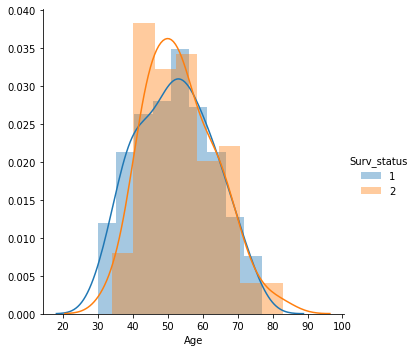

In [8]:
#Distance plot for age relationship with survival status
sns.FacetGrid(df, hue = 'Surv_status', size = 5).map(sns.distplot, 'Age').add_legend()
plt.show()

Ages 30-33 have an assured survival rate of 5+ years while ages 78-83 do not survive beyond 5 years
Too much overlap to extract further information from Age on survival rate

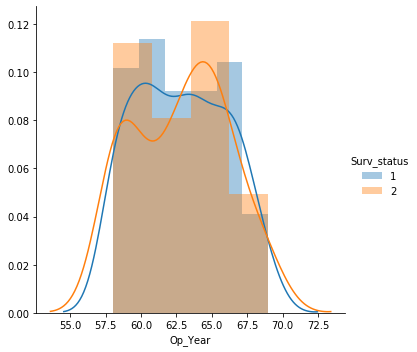

In [9]:
#Distance plot to show relation of operation year with survival status
sns.FacetGrid(df, hue = 'Surv_status', size = 5).map(sns.distplot, 'Op_Year').add_legend()
plt.show()

Survival status seems to not have much relation with the operation year as overlap is throughout the range of years
Hence, no assumptions can be made on the impact of improving surgery technology towards the survival rate of a patient

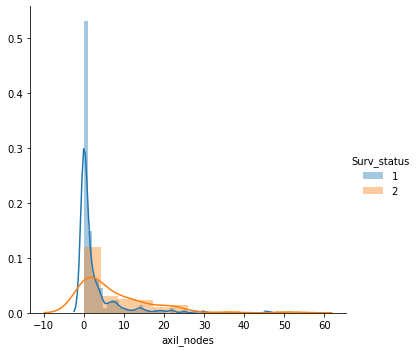

In [11]:
#Distance plot to show relation between number of axil nodes and survival status
sns.FacetGrid(df, hue = 'Surv_status', size = 5).map(sns.distplot, 'axil_nodes').add_legend()
plt.show()

For fewer number of nodes (0-4), there is a far higher (30% - 15%) chance of the patient surviving beyond 5 years, while as the number of axil nodes increases beyond 5 and upto 25, the patient ranges between 4% - 2% chances of surviving below 5 years, and the chances of surviving beyond 5 years is less than 2%